# Preprocessing

## In questa sezione viene effettuato il preprocessing del dataset

### Import delle librerie e moduli necessari

In [42]:
# librerie generali
import pandas as pd
import numpy as np

# librerie per grafici
import matplotlib.pyplot as plt
import seaborn as sns

# librerie per text processing
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# librerie per WordCLoud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# 1.Panoramica del dataset

In [22]:
dataset = pd.read_csv("datasets/kindle_review.csv")
dataset.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


## Dimensione del dataset

In [23]:
print('Dimensione del dataset: ', dataset.shape)

Dimensione del dataset:  (12000, 11)


# 2. Preprocessing del dataset

## 2.1 Dataset cleaning

### Rimozione delle colonne non necessarie

In [24]:
clean_dataset = dataset.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'asin', 'helpful',
                                          'reviewTime', 'reviewerID', 'reviewerName', 'unixReviewTime'}, inplace=False) 

### Controllo ed eventuale rimozione delle righe che contengono valori nulli o mancanti

In [25]:
clean_dataset.dropna(axis='index', how='any', inplace=True)

### Dimensione del dataset processato

In [26]:
print('Dimensione del dataset processato: ', clean_dataset.shape)

Dimensione del dataset processato:  (12000, 3)


## 2.2 Creazione della colonna sentiment

In [27]:
if not 'sentiment' in clean_dataset:
        clean_dataset.insert(3, 'sentiment', 0)
    
clean_dataset.loc[clean_dataset["rating"] == 1, "sentiment"] = 0
clean_dataset.loc[clean_dataset["rating"] == 2, "sentiment"] = 0
clean_dataset.loc[clean_dataset["rating"] == 3, "sentiment"] = 0
clean_dataset.loc[clean_dataset["rating"] == 4, "sentiment"] = 1
clean_dataset.loc[clean_dataset["rating"] == 5, "sentiment"] = 1

In [28]:
clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,0
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,1
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,0
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,0
4,4,I did not expect this type of book to be in li...,Book,1


In [29]:
print('Numero occorrenze dei valori del sentimento:')
clean_dataset['sentiment'].value_counts()

Numero occorrenze dei valori del sentimento:


0    6000
1    6000
Name: sentiment, dtype: int64

## Grafico della distribuzione dei valori della colonna rating

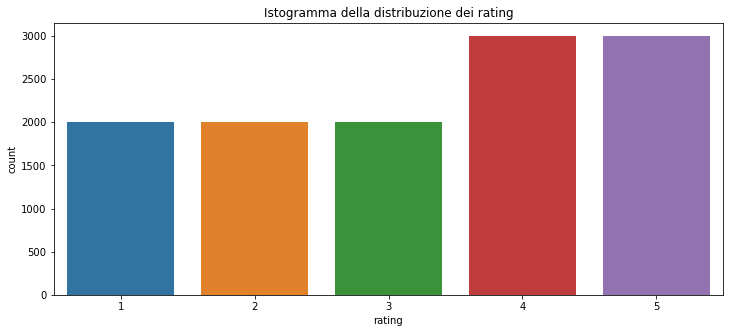

In [30]:
plt.figure(figsize=(12, 5))
plt.title("Istogramma della distribuzione dei rating")
sns.countplot(x="rating", data = clean_dataset, palette=sns.color_palette())
plt.savefig('img/rating_distribution.png')
plt.show()

## Grafico della distribuzione dei valori della colonna sentiment

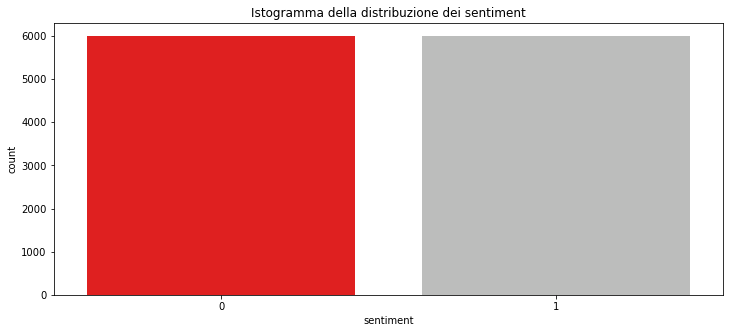

In [31]:
plt.figure(figsize=(12, 5))
plt.title("Istogramma della distribuzione dei sentiment")
sns.countplot(x="sentiment", data = clean_dataset, palette=['#FF0000',"#BCBDBC", "#0DFF06"])
plt.savefig('img/sentiment_distribution.png')
plt.show()

# 3. Text Processing

## In questa sezione viene effettuato il text cleaning delle colonne reviewText e summary. Il text cleaning comprende le seguenti operazioni:


## - Rimozione dei segni di punteggiatura <br /> - Rimozione delle stopwords <br /> - Lowering del testo <br /> - Lemmatizzazione del testo <br />

## Definizione funzioni per il text cleaning

In [32]:
'''
    Questa funzione converte tutte le lettere maiuscole in minuscole presenti
    nella colonna reviewText
'''
def text_lowerer(dataframe, column):
    # lowering delle lettere nella colonna reviewText
    dataframe[column] = dataframe[column].str.lower()
    return dataframe
    
'''
    Questa funzione elimina tutti i segni di punteggiatura
'''
def remove_punctuation(text):
    PUNCTUATION = string.punctuation
    return text.translate(str.maketrans('', '', PUNCTUATION))
    

'''
    Questa funzione elimina tutte le stopwords
'''
def remove_stopwords(text):
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


'''
    Questa funzione lemmatizza tutte le parole
'''
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


## 3.1 Text processing della colonna textReview

In [33]:
# lowering di ogni lettera
clean_dataset = text_lowerer(clean_dataset, "reviewText")

# rimozione delle stopword
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: remove_stopwords(text))

# rimozione dei segni di punteggiatura
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: remove_punctuation(text))

# lemmatizzazione delle parole
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: lemmatize_words(text))

# rimozione delle stopword dopo lemmatizzazione
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: remove_stopwords(text))

clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,jace rankin may short nothing mess man haul sa...,Entertaining But Average,0
1,5,great short read want put read one sit sex sce...,Terrific menage scenes!,1
2,3,ill start say first four book expect 34conclud...,Snapdragon Alley,0
3,3,aggie angela lansbury carry pocketbook instead...,very light murder cozy,0
4,4,expect type book library please find price right,Book,1


## 3.2 Text processing della colonna summary

In [34]:
# lowering di ogni lettera
clean_dataset = text_lowerer(clean_dataset, "summary")

# rimozione delle stopword
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: remove_stopwords(text))

# rimozione dei segni di punteggiatura
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: remove_punctuation(text))

# lemmatizzazione delle parole
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: lemmatize_words(text))

# rimozione delle stopword dopo lemmatizzazione
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: remove_stopwords(text))

clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,jace rankin may short nothing mess man haul sa...,entertaining average,0
1,5,great short read want put read one sit sex sce...,terrific menage scene,1
2,3,ill start say first four book expect 34conclud...,snapdragon alley,0
3,3,aggie angela lansbury carry pocketbook instead...,light murder cozy,0
4,4,expect type book library please find price right,book,1


In [35]:
clean_dataset.to_csv("datasets/clean_dataset.csv")

# 4. Wordcloud

In [36]:
text = " ".join(review for review in clean_dataset.reviewText)   # unisce tutte le descrizioni
stopwords = set(STOPWORDS)

In [37]:
custom_mask = np.array(Image.open('img/wordcloud_image.png'))
wc = WordCloud(background_color = 'white', stopwords = stopwords, mask = custom_mask)
wc.generate(text)

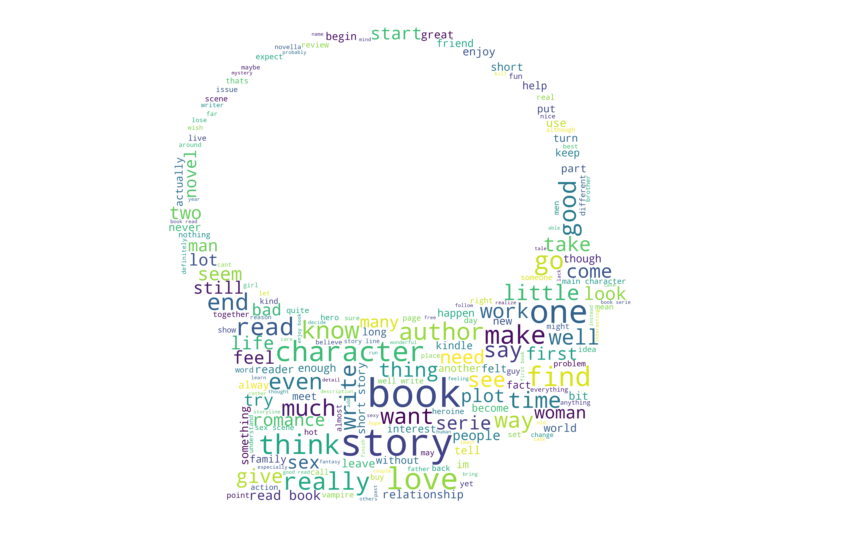

In [38]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()